In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from csv_utils import read_csv
from astropy.table import Table
from copy import copy

test passed


In [2]:
df = read_csv("data/SPECTF.dat")
df[:3]

,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,...,f41,f42,f43,f44,f5,f6,f7,f8,f9,result
0,59,52,72,71,70,77,66,65,67,55,...,74,74,64,67,73,66,72,61,58,1
1,72,63,70,70,72,74,70,71,72,75,...,67,71,56,58,78,82,74,65,69,1
2,71,69,72,71,68,65,61,61,73,71,...,61,41,51,46,67,64,79,65,70,1


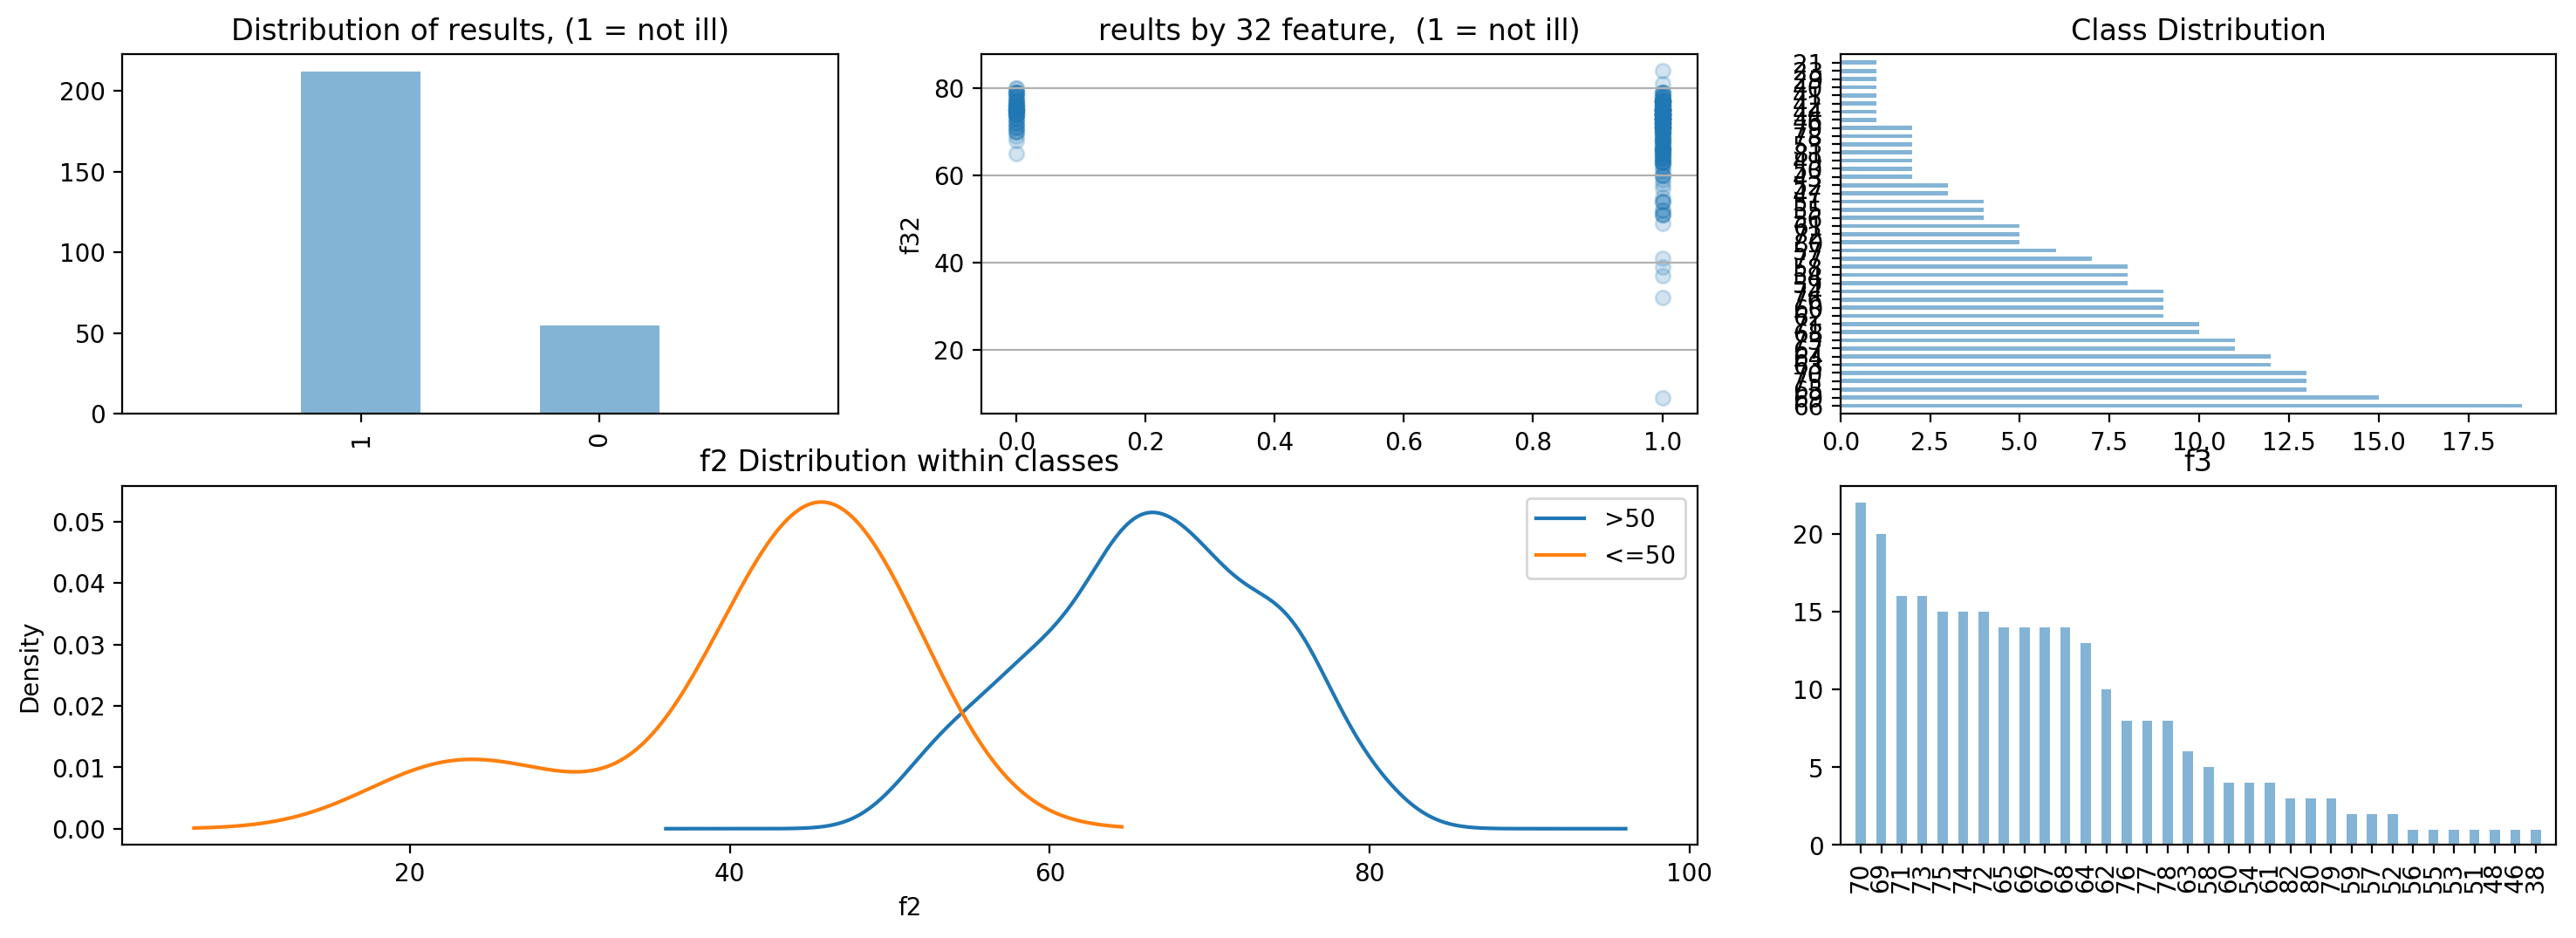

In [3]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=200) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.result.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of results, (1 = not ill)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.result, df.f32, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("f32")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("reults by 32 feature,  (1 = not ill)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.f2.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.f2.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.f2[df.f2 > 50].plot(kind='kde')    
df.f2[df.f2 <= 50].plot(kind='kde')
 # plots an axis lable
plt.xlabel("f2")    
plt.title("f2 Distribution within classes")
# sets our legend for our graph.
plt.legend(('>50','<=50'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.f3.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.f3.value_counts()))
# specifies the parameters of our graphs
plt.title("f3")

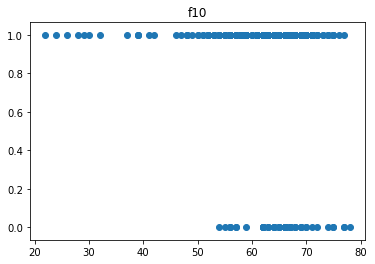

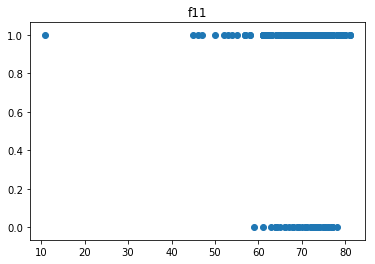

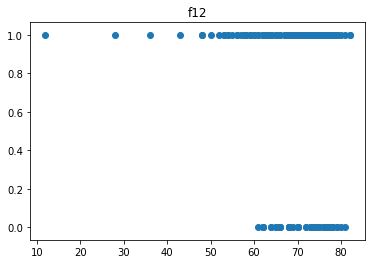

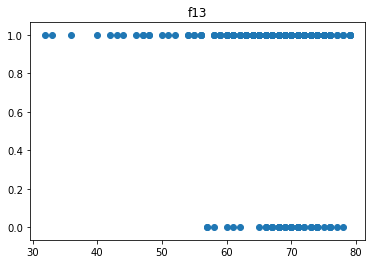

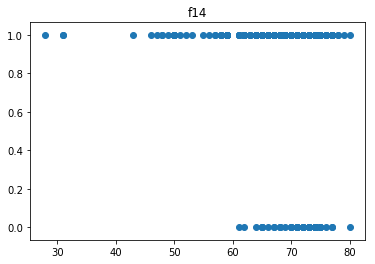

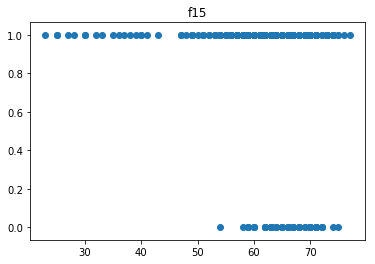

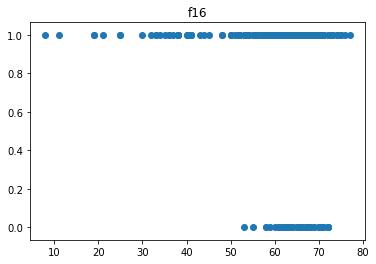

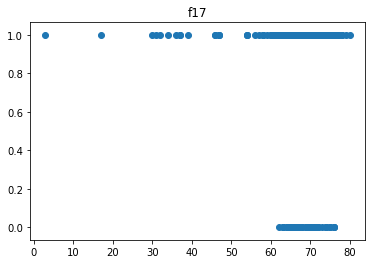

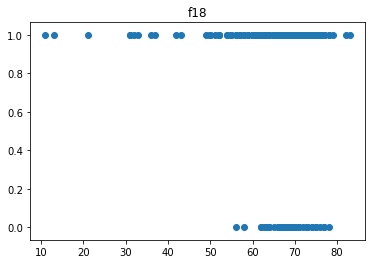

In [4]:
for i, feature in enumerate(df.columns[1:10]):
    plt.title(feature)
    plt.scatter(df.get(feature),df.result)
    plt.show()

In [5]:
def accuracy_score(y1,y2):
    return len(y1[y1 == y2])*1./len(y1)

In [6]:
def prepare_data(df, part=200):
    df = df.iloc[np.random.permutation(len(df))]
    X = df.iloc[:, df.columns != 'result'].values
    Y = df['result'].values
    x_train = X[:part, :]
    y_train = Y[:part]
    x_test = X[part:, :]
    y_test = Y[part:]
    return x_train, y_train, x_test, y_test

In [7]:
from sklearn.linear_model import LogisticRegression as LR_sklearn
from sklearn.ensemble import RandomForestClassifier as RF_sklearn
from logistic_regression import LogisticRegression as LR
from random_forest import RandomForest as RF

In [8]:
def learn(x_train, y_train, x_test, y_test, predictor_lr, predictor_rf):
    # Logistic Regression
    predictor_lr.fit(x_train, y_train)
    prediction_lr = predictor_lr.predict(x_test)
    # Random Forest
    predictor_rf.fit(x_train, y_train)
    prediction_rf = predictor_rf.predict(x_test)
    return accuracy_score(prediction_lr, y_test), accuracy_score(prediction_rf, y_test)

In [9]:
def compute(df, num=10, part=200, params={"n": 10, "depth": 5}):
    acc_lr, acc_rf, my_lr, my_rf = [], [], [], []
    for i in range(num):
        x_train, y_train, x_test, y_test = prepare_data(df, part=part)
        sk = learn(x_train, y_train, x_test, y_test, predictor_lr=LR_sklearn(), predictor_rf=RF_sklearn(n_estimators=params["n"]))
        my = learn(x_train, y_train, x_test, y_test, predictor_lr=LR(), predictor_rf=RF(num_trees=params["n"], max_tree_depth=params["depth"]))
        acc_lr.append(sk[0])
        acc_rf.append(sk[1])
        my_lr.append(my[0])
        my_rf.append(my[1])
    return np.mean(acc_lr), np.mean(acc_rf), np.mean(my_lr), np.mean(my_rf)

In [10]:
data_len = df.shape[0]
table = Table(names=('train', 'test', 'type', 'params', 'accuracy'), dtype=('i4', 'i4', 'S6', 'O', 'f4'))
for i in range(5):
    print('Step:',i)
    train_part = 120 + 20 * i
    param = {"n" : 5, "depth" : 1}
    for j in range(7, 10):
        param["n"] = 5 * j
        param["depth"] = j
        lr, rf, mlr, mrf = compute(df, num=1, part=train_part, params=param)
        table.add_row((train_part, data_len - train_part, 'sk_lr', {}, lr))
        table.add_row((train_part, data_len - train_part, 'sk_rf', copy(param), rf))
        table.add_row((train_part, data_len - train_part, 'my_lr', {}, mlr))
        table.add_row((train_part, data_len - train_part, 'my_rf', copy(param), mrf))

Step: 0
Step: 1
Step: 2
Step: 3
Step: 4


In [11]:
table.show_in_notebook()

idx,train,test,type,params,accuracy
0,120,147,sk_lr,{},0.680272
1,120,147,sk_rf,"{'n': 35, 'depth': 7}",0.789116
2,120,147,my_lr,{},0.802721
3,120,147,my_rf,"{'n': 35, 'depth': 7}",0.768707
4,120,147,sk_lr,{},0.653061
5,120,147,sk_rf,"{'n': 40, 'depth': 8}",0.836735
6,120,147,my_lr,{},0.809524
7,120,147,my_rf,"{'n': 40, 'depth': 8}",0.70068
8,120,147,sk_lr,{},0.727891
9,120,147,sk_rf,"{'n': 45, 'depth': 9}",0.802721
